<a href="https://colab.research.google.com/github/z-arabi/SRU-deeplearning-workshop/blob/master/05_1_mlp_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/z-arabi/SRU-deeplearning-workshop
%cd SRU-deeplearning-workshop

Cloning into 'SRU-deeplearning-workshop'...
remote: Enumerating objects: 203, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 203 (delta 51), reused 39 (delta 12), pack-reused 89
Receiving objects: 100% (203/203), 14.85 MiB | 17.22 MiB/s, done.
Resolving deltas: 100% (88/88), done.
/content/SRU-deeplearning-workshop


In [2]:
import numpy as np
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

The dataset linke:  
https://archive.ics.uci.edu/ml/datasets/iris  

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
 - Iris Setosa
 - Iris Versicolour
 - Iris Virginica

In [3]:
iris_data = load_iris() # load the iris dataset

In [4]:
print(iris_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
iris_data.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [6]:
iris_data.target[0]

0

In [7]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
print(len(iris_data.data))

# x > 150*4
# y > (150,)

x = np.array(iris_data.data)
y = np.array(iris_data.target)

print(x.shape, y.shape, x[0])

150
(150, 4) (150,) [5.1 3.5 1.4 0.2]


In [10]:
# y must be one hot > 150*3
y = keras.utils.to_categorical(y, num_classes=3)

print(y.shape)

(150, 3)


In [11]:
# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

print(train_x.shape, test_x.shape)

(120, 4) (30, 4)


# Pandas Example

In [12]:
import pandas as pd

df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df["target"] = iris_data.target
df["target_name"] = df["target"].map(lambda x: iris_data.target_names[x])

# we consider we have this df
df = pd.get_dummies(df,columns=["target_name"], prefix=[""])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,_setosa,_versicolor,_virginica
0,5.1,3.5,1.4,0.2,0,1,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0
3,4.6,3.1,1.5,0.2,0,1,0,0
4,5.0,3.6,1.4,0.2,0,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,0,1
146,6.3,2.5,5.0,1.9,2,0,0,1
147,6.5,3.0,5.2,2.0,2,0,0,1
148,6.2,3.4,5.4,2.3,2,0,0,1


In [13]:
x_df = df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]]
print(x_df.shape, np.sum(np.sum(x==x_df)))

y_df = df[["_setosa", "_versicolor", "_virginica"]]
print(y_df.shape, np.sum(np.sum(y==y_df)))


(150, 4) 600
(150, 3) 450


# Build Model & Train

In [19]:
# Build the model
model = model = Sequential() 
# we have 4 features
model.add(Dense(10, activation='relu', input_dim=4))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                50        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Train the model
model.fit(train_x,train_y,epochs=200,batch_size=5)

Epoch 1/200
24/24 [==============================] - 2s 2ms/step - loss: 1.3056 - accuracy: 0.4250
Epoch 2/200
24/24 [==============================] - 0s 2ms/step - loss: 1.0835 - accuracy: 0.4083
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 1.0715 - accuracy: 0.4083
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 0.9793 - accuracy: 0.4667
Epoch 5/200
24/24 [==============================] - 0s 2ms/step - loss: 0.9407 - accuracy: 0.4833
Epoch 6/200
24/24 [==============================] - 0s 2ms/step - loss: 0.9249 - accuracy: 0.5083
Epoch 7/200
24/24 [==============================] - 0s 2ms/step - loss: 0.8583 - accuracy: 0.5500
Epoch 8/200
24/24 [==============================] - 0s 2ms/step - loss: 0.9052 - accuracy: 0.5000
Epoch 9/200
24/24 [==============================] - 0s 2ms/step - loss: 0.7910 - accuracy: 0.6000
Epoch 10/200
24/24 [==============================] - 0s 2ms/step - loss: 0.8209 - accuracy: 0.5083
Epoch 11/

# Testing

In [23]:
# FIRT > Test on unseen data
results = model.evaluate(test_x, test_y)

results

1/1 [==============================] - 0s 433ms/step - loss: 0.0873 - accuracy: 0.9667


[0.08725865930318832, 0.9666666388511658]

In [24]:
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Final test set loss: 0.087259
Final test set accuracy: 0.966667


In [26]:
# SECOND
predicted = model.predict(test_x)
print(predicted.shape)

predicted_classes=np.argmax(predicted,axis=1)
print(predicted_classes.shape)

1/1 [==============================] - 0s 35ms/step
(30, 3)
(30,)


In [36]:
print(test_y.shape)

test_y_class = np.argmax(test_y,axis=1)
print(test_y_class)

(30, 3)
[1 0 0 2 1 0 0 2 0 1 1 0 0 0 0 2 2 0 0 0 0 2 1 1 1 2 0 0 1 2]


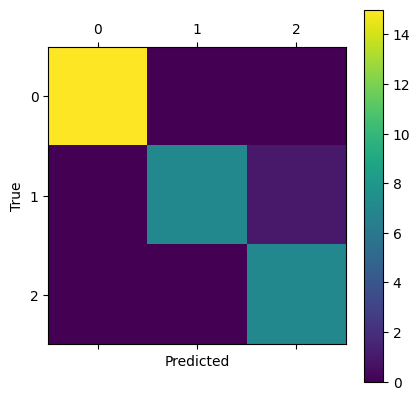

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(test_y_class, predicted_classes)

# plt.matshow(cm) / plt.imshow(cm)
plt.matshow(cm)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

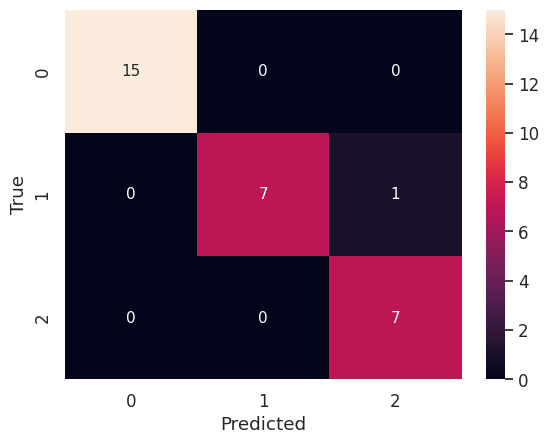

In [42]:
# matplotlib doesn't have heatmap and instead it has imshow
! pip install --quiet seaborn
import seaborn as sns

sns.set(font_scale=1.1) # for label size
heatmap = sns.heatmap(cm, annot=True, annot_kws={"size": 11}) # font size

heatmap.set_xlabel('Predicted')
heatmap.set_ylabel('True')

plt.show()